In [13]:
'''
From `Into To Statistical Learning`, by Prof. Gareth James

Suppose that we are statistical consultants hired by a client to provide advice on how to improve 
sales of a particular product. The Advertising data set consists of the sales of that 
product in 200 different markets, along with advertising budgets for the product in each of those 
markets for three different media: TV, radio, and newspaper.

Let's predict our sales by controling the butget for advertising.
'''

# Import the libs we need
import pandas as pd
import seaborn as sbn
%matplotlib inline

In [8]:
# Read dataset
dataset = pd.read_csv('/Users/croves/Documents/Code/Data Science/resources/advertising.csv')

In [9]:
# Let's see a few rows of our dataset
dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
'''
It seems that the first column ("Unnamed: 0") suposed to be the line index. 
Let's change it!
'''
dataset = pd.read_csv('/Users/croves/Documents/Code/Data Science/resources/advertising.csv', index_col=0)

In [11]:
dataset.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
'''
Way better! Now let's split our data
Sales is our dependent variable - it means sales depends on spending in tv, radio and newspaper
TV, radio and newspaper are our independent variables. They don't depend on any other variable.
Usually we call dependent variables as `y` and independent variables as `Xn`
'''

y = dataset['sales']
X = dataset[['TV', 'radio', 'newspaper']]

print(y.head())
print(X.head())

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64
      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4


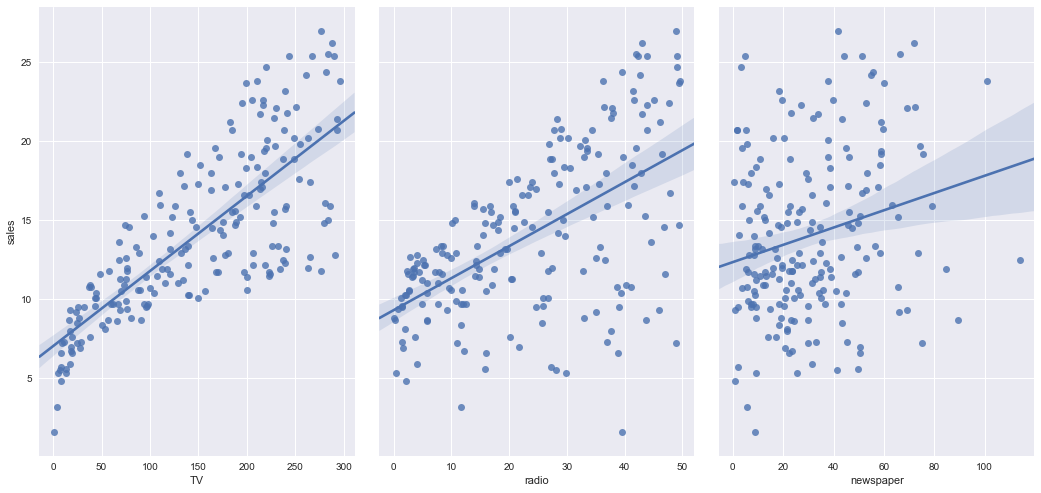

In [15]:
# Before getting into the math, let's see if there's any relationship between each `X` with `y`
sbn.pairplot(dataset, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [17]:
'''
As we can see in charts above, TV seems to have a high impact in sales. Radio have some impact, but not much as TV.
Newspaper seems to have a very weak correlation in sales. You can see a lot of outliers in chart.
Let's create a funcion that explains the behavior of sales compared to each media type.
'''
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X, y)

print(reg.intercept_) # This is the intercept. It says what sales will be if our budget in TV, radio and newspaper is 0
print(reg.coef_) # The coeficients are the multiplier for each `Xn`

'''
Our dataset is in thousand of dolars, so in this case for each $1000 in TV,
we can expect a increase in $45.76 in sales. The same for radio and newspaper.
Notice that the coeficient for newspaper is negative. It means that investing in newspaper reduces the sales.

Our function, then is: y = 0.04576465*TV + 0.18853002*radio - 0.00103749*newspaper + 2.93888936946
'''

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [22]:
'''
How can we check the acurracy of this model? There are a few indicators. The first one is Rsquare (R²).
R² floats from 0 to 1, where 1 means that the funcion explain 100% of the model. So, the higher R²,
the better the model.
'''
rsquare = reg.score(X, y)
print(rsquare) # Our R² is 0.8972, or 89.72% of the sales behavior is explained by that equation

0.897210638179


In [31]:
'''
Let's play with predictions now. We're going to create a new dataset with our future budgets for TV, 
radio and newspaper
'''

import numpy as np
future_budget = np.array([[100, 80, 50], [200, 30, 100], [140, 16, 0]])
reg.predict(future_budget)

array([ 22.54588062,  17.64396966,  12.36242   ])

Remember, all values are in thousand of dollars
In the first scenario, where we invested $100 in TV, $80 in radio and $50 in newspaper, our sales will be $22.54 
with almost 90% os accuracy.

In this example we used a technique called `Ordinary Least Squares` (OLS) and it is the simpliest form or regression.
Coefficient estimates for Ordinary Least Squares rely on the independence of the model terms. In our case, if for some
reason, TV, radio or newspaper where correlated with each other, our model becomes highly sensitive
to random errors in the observed response, producing a large variance. It means that our predicted outcome wouldn't be
reliable.

This fairly simple example could been done in Excel or any other statistical software. I reproduced it using Gretl
and the outcome was the same

(https://i.imgur.com/kvhnQOJ.png)

But what is the advantage of using other Machine Learning algorithims to this?
With advanced algorithims, we can adjust better or parameters and produce a more acurate output.

Let's do the same exercice, but now using Machine Learning

In [32]:
# We still have our original dataset
dataset.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [34]:
'''
Now we are going to split this dataset into 2 pieces: the trainig and the test
The training dataset will be used by our Machine Learning algorithim to test the hypotesis generated to see
which one fits the best. Then, it will use it in test dataset to produce our final outcome
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
# Default is 75% for training and 25% for testing
print(X_train.shape) # 150 lines, 3 columns (TV, radio and newspaper)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [45]:
# Let's run another regression and see the coeficients
ml_reg = linear_model.LinearRegression()
ml_reg.fit(X_train, y_train)

print(ml_reg.intercept_)
print(ml_reg.coef_)
print(ml_reg.score(X_train, y_train))

2.87696662232
[ 0.04656457  0.17915812  0.00345046]
0.890307557756


In [40]:
'''
Our previous intercept and coeficient was 
2.93888936946
[ 0.04576465  0.18853002 -0.00103749]

The Rsquare is almost the same.

We have a huge difference here: in this model, newspaper doesn't reduce sales.
So now our function is y = 0.04656457*TV + 0.17915812*radio + 0.00345046*newspaper + 2.87696662232

Now we are going to use our test dataset to make the predictions
'''
y_pred = ml_reg.predict(X_test)
print(y_pred)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


In [43]:
'''
So if we use our budgets in test dataset to predict sales, that would be our values. But it is correct?
Let's compare our predicted sales with actual sales.

We are going to use a metric called RMSE: Root Mean Squared Errors. We gonna calculate the difference between 
our current sales with the one we predicted above, square it and then take out its root. This way, big outliers won't
affect our average
'''
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

1.40465142303


In [44]:
'''
This result means that the predicted values, in average, are $1.40 above or below the true sales value.
It's a pretty good model. So, if we want to predict our sales for a $100 budget on TV, $80 on radio and $20 on 
newspaper, we would have:
'''
TV = 100
radio = 80
newspaper = 20
y = 0.04656457*TV + 0.17915812*radio + 0.00345046*newspaper + 2.87696662232

print(y)

21.93508242232


Given that our error is 1.40, we can say that, for that budget on TV, radio and newspaper, our sales would be somewhere between 20.53 and 23.33.

So, wich one is best? Well, now it's time to interpretate the results.

In this particular case, it's highly unlikely that advertise something in the newspaper would bring our sales down. Maybe newspaper ads is in the past and because of that it doesn't affect our sales too much.

I would say that the second model fits the best. 